### Importing the relevent libraries

In [363]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters

### Importing the dataframe

In [364]:
sucidedataframe = pd.read_csv("suicidedataextrafestures.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [365]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

## 1. Data pre-processing

In [367]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["country", "year",  "age" ,"sex", "population", "suicides_no",  \
"Individuals using the Internet (% of population)", "Labor force, total", \
"Mobile cellular subscriptions (per 100 people)", "suicidesper100k"]]## 1. Data pre-processing

In [368]:
sucidedataframe.head(5)

,country,year,age,sex,population,suicides_no,Individuals using the Internet (% of population),"Labor force, total",Mobile cellular subscriptions (per 100 people),suicidesper100k
0,Argentina,1985,75+ years,male,363000,202,0.0,0,0.0,55.65
1,Argentina,1985,55-74 years,male,1997000,485,0.0,0,0.0,24.29
2,Argentina,1985,35-54 years,male,3346300,414,0.0,0,0.0,12.37
3,Argentina,1985,55-74 years,female,2304000,210,0.0,0,0.0,9.11
4,Argentina,1985,25-34 years,male,2234200,177,0.0,0,0.0,7.92


In [369]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Country", "Year", "Age", "Gender", "Population", "Suicides_no", \
"Internet_Usage_per_%_Population", "Total_Labour_force", "Cellular_subscriptions_per_100_people", \
                                           "Suicidesper100k"],axis=1)

In [370]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['Country', 'Year', 'Age', 'Gender', 'Population', 'Suicides_no',
       'Internet_Usage_per_%_Population', 'Total_Labour_force',
       'Cellular_subscriptions_per_100_people', 'Suicidesper100k'],
      dtype='object')

In [371]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(15110, 10)

### Dealing with null values

In [372]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                    0
Year                                       0
Age                                        0
Gender                                     0
Population                                 0
Suicides_no                                0
Internet_Usage_per_%_Population          108
Total_Labour_force                         0
Cellular_subscriptions_per_100_people      0
Suicidesper100k                            0
dtype: int64

In [373]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [374]:
sucidedataframe.reset_index(drop=True, inplace=True)

In [375]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                  0
Year                                     0
Age                                      0
Gender                                   0
Population                               0
Suicides_no                              0
Internet_Usage_per_%_Population          0
Total_Labour_force                       0
Cellular_subscriptions_per_100_people    0
Suicidesper100k                          0
dtype: int64

In [376]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(15002, 10)

In [377]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                15002 non-null  object 
 1   Year                                   15002 non-null  int64  
 2   Age                                    15002 non-null  object 
 3   Gender                                 15002 non-null  object 
 4   Population                             15002 non-null  int64  
 5   Suicides_no                            15002 non-null  int64  
 6   Internet_Usage_per_%_Population        15002 non-null  float64
 7   Total_Labour_force                     15002 non-null  int64  
 8   Cellular_subscriptions_per_100_people  15002 non-null  float64
 9   Suicidesper100k                        15002 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.1+ MB


### Dealing with repetetive values

In [378]:
sucidedataframe.nunique()  # 

Country                                     48
Year                                        32
Age                                          6
Gender                                       2
Population                               14461
Suicides_no                               1997
Internet_Usage_per_%_Population            797
Total_Labour_force                         824
Cellular_subscriptions_per_100_people      823
Suicidesper100k                           4136
dtype: int64

In [379]:
sucidedataframe.duplicated().sum()

0

In [380]:
print(sucidedataframe.pivot_table(columns=['Year'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Year
1985    300
1986    312
1987    360
1988    348
1989    372
1990    468
1991    480
1992    480
1993    456
1994    492
1995    504
1996    516
1997    504
1998    504
1999    528
2000    540
2001    528
2002    516
2003    504
2004    492
2005    504
2006    516
2007    528
2008    504
2009    552
2010    552
2011    540
2012    528
2013    516
2014    504
2015    444
2016    110
dtype: int64


In [381]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Gender
female    7501
male      7501
dtype: int64


In [382]:
print(sucidedataframe.pivot_table(columns=['Country'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Country
Argentina               372
Armenia                 298
Australia               324
Austria                 382
Azerbaijan              168
Belgium                 372
Brazil                  372
Bulgaria                360
Canada                  348
Chile                   372
Colombia                372
Croatia                 262
Cuba                    288
Czech Republic          322
Denmark                 264
Finland                 348
France                  360
Georgia                 264
Germany                 312
Greece                  372
Hungary                 310
Iceland                 382
Ireland                 360
Israel                  372
Italy                   372
Jamaica                 204
Japan                   372
Mexico                  372
Mongolia                 10
Netherlands             382
New Zealand             348
Norway                  360
Poland                  288
Portugal                324
Romania                 334
Russian Fede

In [383]:
sucidedataframe.head(1)

,Country,Year,Age,Gender,Population,Suicides_no,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,Suicidesper100k
0,Argentina,1985,75+ years,male,363000,202,0.0,0,0.0,55.65


In [384]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Age
15-24 years    2504
25-34 years    2504
35-54 years    2504
5-14 years     2482
55-74 years    2504
75+ years      2504
dtype: int64


In [385]:
sucidedataframe.index = pd.RangeIndex(len(sucidedataframe.index))

In [386]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Suicides_no,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,Suicidesper100k
0,Argentina,1985,75+ years,male,363000,202,0.0,0,0.0,55.65
1,Argentina,1985,55-74 years,male,1997000,485,0.0,0,0.0,24.29
2,Argentina,1985,35-54 years,male,3346300,414,0.0,0,0.0,12.37
3,Argentina,1985,55-74 years,female,2304000,210,0.0,0,0.0,9.11
4,Argentina,1985,25-34 years,male,2234200,177,0.0,0,0.0,7.92


### Encoding variables to  0 and 1

In [387]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))

Gender
female    7501
male      7501
dtype: int64


In [388]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))

Age
15-24 years    2504
25-34 years    2504
35-54 years    2504
5-14 years     2482
55-74 years    2504
75+ years      2504
dtype: int64


In [389]:
le = LabelEncoder()
sucidedataframe.Gender= le.fit_transform(sucidedataframe.Gender)
sucidedataframe.Age= le.fit_transform(sucidedataframe.Age)

In [390]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))

Gender
0    7501
1    7501
dtype: int64


In [391]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Age
0    2504
1    2504
2    2504
3    2482
4    2504
5    2504
dtype: int64


In [392]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Suicides_no,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,Suicidesper100k
0,Argentina,1985,5,1,363000,202,0.0,0,0.0,55.65
1,Argentina,1985,4,1,1997000,485,0.0,0,0.0,24.29
2,Argentina,1985,2,1,3346300,414,0.0,0,0.0,12.37
3,Argentina,1985,4,0,2304000,210,0.0,0,0.0,9.11
4,Argentina,1985,1,1,2234200,177,0.0,0,0.0,7.92


In [393]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. Could be useful for feature scaling afterwords.

,Year,Age,Gender,Population,Suicides_no,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,Suicidesper100k
count,15002.0,15002.0,15002.0,15002.0,15002.0,15002.0,15002.0,15002.0,15002.0
mean,2001.0,2.0,0.0,3051802.0,401.0,23.0,12580697.0,44.0,13.0
std,9.0,2.0,1.0,4921820.0,1189.0,30.0,24680372.0,50.0,18.0
min,1985.0,0.0,0.0,4400.0,0.0,0.0,0.0,0.0,0.0
25%,1994.0,1.0,0.0,426000.0,16.0,0.0,0.0,0.0,2.0
50%,2001.0,2.0,0.0,1058822.0,81.0,6.0,2931693.0,16.0,7.0
75%,2008.0,4.0,1.0,3643449.0,277.0,44.0,15934997.0,92.0,18.0
max,2016.0,5.0,1.0,43805214.0,22338.0,97.0,158831064.0,172.0,178.0


In [394]:
sucidedataframe.loc[sucidedataframe["Suicidesper100k"] < 45, "Suicidesper100k"] = 1  # Encoding values above 43 
                                                # as and below 86 to 2.

In [395]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 45) & (sucidedataframe["Suicidesper100k"] < 89), "Suicidesper100k"] = 2  # Encoding values above 43 
                                                # as and below 86 to 2.

In [396]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 86) & (sucidedataframe["Suicidesper100k"] < 178), "Suicidesper100k"] = 3  # Encoding values above 86 
                                                # as and below 172 to 3.

In [397]:
print(sucidedataframe.pivot_table(columns=['Suicidesper100k'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicidesper100k
1.0    14212
2.0      649
3.0      141
dtype: int64


In [398]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Suicides_no,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,Suicidesper100k
0,Argentina,1985,5,1,363000,202,0.0,0,0.0,2.0
1,Argentina,1985,4,1,1997000,485,0.0,0,0.0,1.0
2,Argentina,1985,2,1,3346300,414,0.0,0,0.0,1.0
3,Argentina,1985,4,0,2304000,210,0.0,0,0.0,1.0
4,Argentina,1985,1,1,2234200,177,0.0,0,0.0,1.0


In [399]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                15002 non-null  object 
 1   Year                                   15002 non-null  int64  
 2   Age                                    15002 non-null  int32  
 3   Gender                                 15002 non-null  int32  
 4   Population                             15002 non-null  int64  
 5   Suicides_no                            15002 non-null  int64  
 6   Internet_Usage_per_%_Population        15002 non-null  float64
 7   Total_Labour_force                     15002 non-null  int64  
 8   Cellular_subscriptions_per_100_people  15002 non-null  float64
 9   Suicidesper100k                        15002 non-null  float64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 1.0+ MB


In [400]:
sucidedataframe['Internet_Usage_per_%_Population'] = sucidedataframe['Internet_Usage_per_%_Population'].astype(np.int64)  # converting float to int.

In [401]:
sucidedataframe['Cellular_subscriptions_per_100_people'] = sucidedataframe['Cellular_subscriptions_per_100_people'].astype(np.int64)  # converting float to int.

In [402]:
sucidedataframe['Suicidesper100k'] = sucidedataframe['Suicidesper100k'].astype(np.int64)  # converting float to int.

In [403]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Country                                15002 non-null  object
 1   Year                                   15002 non-null  int64 
 2   Age                                    15002 non-null  int32 
 3   Gender                                 15002 non-null  int32 
 4   Population                             15002 non-null  int64 
 5   Suicides_no                            15002 non-null  int64 
 6   Internet_Usage_per_%_Population        15002 non-null  int64 
 7   Total_Labour_force                     15002 non-null  int64 
 8   Cellular_subscriptions_per_100_people  15002 non-null  int64 
 9   Suicidesper100k                        15002 non-null  int64 
dtypes: int32(2), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

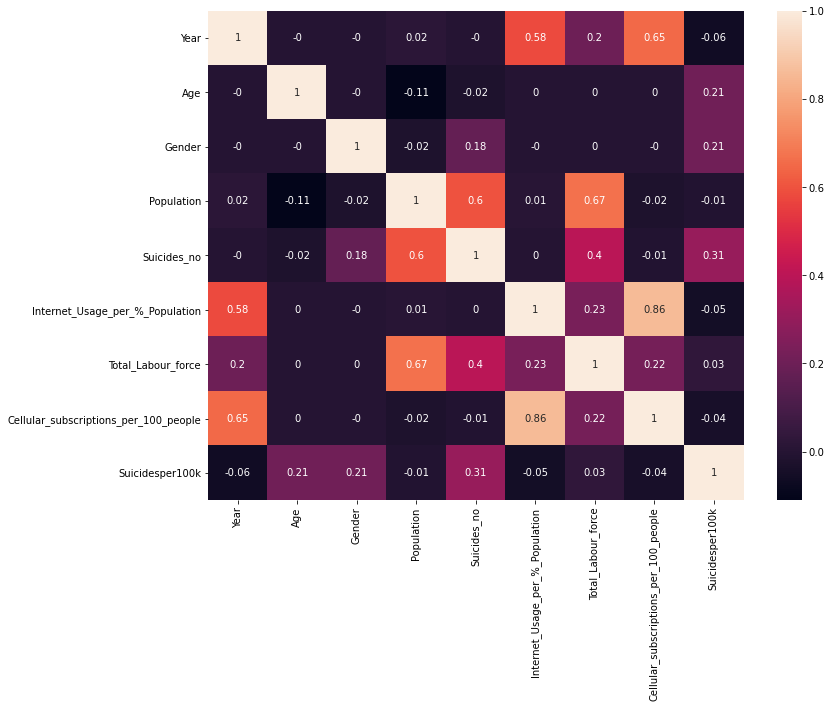

In [404]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

### selecting X and Y values 

In [405]:
X = sucidedataframe.iloc[:, :-1].values  # selecting the values for the X variable.
X_before_encoding = X

In [406]:
y = sucidedataframe[["Suicidesper100k"]].to_numpy()  # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [407]:
print(X)

[['Argentina' 1985 5 ... 0 0 0]
 ['Argentina' 1985 4 ... 0 0 0]
 ['Argentina' 1985 2 ... 0 0 0]
 ...
 ['Uzbekistan' 2014 3 ... 0 0 0]
 ['Uzbekistan' 2014 3 ... 0 0 0]
 ['Uzbekistan' 2014 4 ... 0 0 0]]


In [408]:
print(y)

[[2]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


### One Hot Encoding

In [409]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Country'], aggfunc='size')  # counts duplicates in the selected dataframe column.

Country
Argentina               372
Armenia                 298
Australia               324
Austria                 382
Azerbaijan              168
Belgium                 372
Brazil                  372
Bulgaria                360
Canada                  348
Chile                   372
Colombia                372
Croatia                 262
Cuba                    288
Czech Republic          322
Denmark                 264
Finland                 348
France                  360
Georgia                 264
Germany                 312
Greece                  372
Hungary                 310
Iceland                 382
Ireland                 360
Israel                  372
Italy                   372
Jamaica                 204
Japan                   372
Mexico                  372
Mongolia                 10
Netherlands             382
New Zealand             348
Norway                  360
Poland                  288
Portugal                324
Romania                 334
Russian Fede

In [410]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')    
# transformers= [('what to do', method , [index of column to apply method on])]
# remainder='what to do with the remaining columns'

X = ct.fit_transform(X).toarray()  # applies the above method on the given array.

In [411]:
print(X_before_encoding[0])

['Argentina' 1985 5 1 363000 202 0 0 0]


In [412]:
print(X[0][49])

5.0


In [413]:
print(X[0])

[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.985e+03
 5.000e+00 1.000e+00 3.630e+05 2.020e+02 0.000e+00 0.000e+00 0.000e+00]


## Spliting the datasets into a training and test set 

In [414]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [415]:
UnScaled_X_train,UnScaled_X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [416]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of Y_train is ", len(Y_train))  
print("The length of X_test is ",len(X_test), " and the length of Y_test is ", len(Y_test))

The length of X_train is  12001  and the length of Y_train is  12001
The length of X_test is  3001  and the length of Y_test is  3001


In [417]:
# print both test and train set to see them.
print("X_test ", X_test, "\nY_test ", Y_test, "\nX_train ", X_train, "\nY_train ", Y_train)

X_test  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.2000000e+01
  1.8845460e+06 5.7000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4000000e+01
  1.7300168e+07 4.5000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  2.0355760e+06 2.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.1000000e+01
  2.4392594e+07 1.0800000e+02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.2000000e+01
  5.2050120e+06 1.3200000e+02]] 
Y_test  [[3]
 [1]
 [2]
 ...
 [1]
 [1]
 [1]] 
X_train  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8000000e+01
  1.8201770e+07 7.1000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4000000e+01
  1.3116640e+06 1.0500000e+02]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9000000e+01
  2.3070472e+07 1.0700000e+

In [418]:
# print both test and train set to see them.
print("X_test ", X_test, "\nY_test ", Y_test, "\nX_train ", X_train, "\nY_train ", Y_train)

X_test  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.2000000e+01
  1.8845460e+06 5.7000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4000000e+01
  1.7300168e+07 4.5000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  2.0355760e+06 2.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.1000000e+01
  2.4392594e+07 1.0800000e+02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.2000000e+01
  5.2050120e+06 1.3200000e+02]] 
Y_test  [[3]
 [1]
 [2]
 ...
 [1]
 [1]
 [1]] 
X_train  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8000000e+01
  1.8201770e+07 7.1000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4000000e+01
  1.3116640e+06 1.0500000e+02]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9000000e+01
  2.3070472e+07 1.0700000e+

In [419]:
UnScaled_X_train[0][49]

1.0

In [420]:
UnScaled_X_test[0][49]

5.0

## Feature Scaling 

In [421]:
print(X_before_encoding[0])

['Argentina' 1985 5 1 363000 202 0 0 0]


In [422]:
print(X[0][49])

5.0


In [423]:
X_train[0][49]  # checking element in the 0th index

1.0

In [424]:
sc = StandardScaler()  # creating an instance of the object.

X_train[:, 49:] = sc.fit_transform(X_train[:, 49:])  # Scaling x_train
X_test[:,49:] = sc.transform(X_test[:, 49:])  # Scaling y_train

In [425]:
print("X_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.

X_test  [[ 0.          0.          0.         ... -0.02815218 -0.42917366
   0.27404917]
 [ 0.          0.          0.         ...  0.04021862  0.19598197
   0.03107903]
 [ 0.          0.          0.         ... -0.7460455  -0.42304888
  -0.83956398]
 ...
 [ 0.          0.          0.         ... -0.7802309  -0.50559838
  -0.88005901]
 [ 0.          0.          0.         ...  0.96322432  0.48360385
   1.30667228]
 [ 0.          0.          0.         ...  1.33926368 -0.29451753
   1.79261256]] 

X_train  [[ 0.          0.          0.         ... -0.16489376  0.23254499
   0.55751434]
 [ 0.          0.          0.         ... -0.7802309  -0.50559838
  -0.88005901]
 [ 0.          0.          0.         ...  0.04021862 -0.45240596
   1.24592974]
 ...
 [ 0.          0.          0.         ...  1.23670749  0.42998733
   1.28642477]
 [ 1.          0.          0.         ... -0.23326455  0.19989181
  -0.17139609]
 [ 0.          0.          0.         ... -0.7802309  -0.50559838
  -0.88005901

In [430]:
X_train[0][49]

-0.8811317315276205

In [427]:
UnScaled_X_train[0][49]

1.0

In [428]:
X_test[0][49]

1.4614606278128701

In [429]:
UnScaled_X_test[0][49]

5.0